# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

np.random.seed(307)

In [2]:
from stuff import (
    get_means_variances,
    sufficient_vs_threshold,
    approx
)

from data import (
    synthetic_regression,
    synthetic_classification,
    liver_disorders
)

from visualize import (
    plot_means_variances,
    plot_sufficient_vs_threshold,
    plot_approximation
)

/Users/kisnikser/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Synthetic regression

In [3]:
# set number of samples and features in synthetic dataset
n_samples = 1000
n_features = 2

In [57]:
%%time
X, y = synthetic_regression(n_samples=n_samples, n_features=n_features)

CPU times: user 32.6 s, sys: 1.13 s, total: 33.7 s
Wall time: 5.49 s


In [58]:
def loss(w, X=X, y=y):
    return np.mean((y - X @ w)**2)

# Visualization

In [68]:
w1 = np.linspace(-10, 10, 100)
w2 = np.linspace(-10, 10, 100)
w1, w2 = np.meshgrid(w1, w2)
W = np.stack((w1, w2), axis=-1)
z = np.array([loss(w) for w in W.reshape(-1, 2)]).reshape(w1.shape)

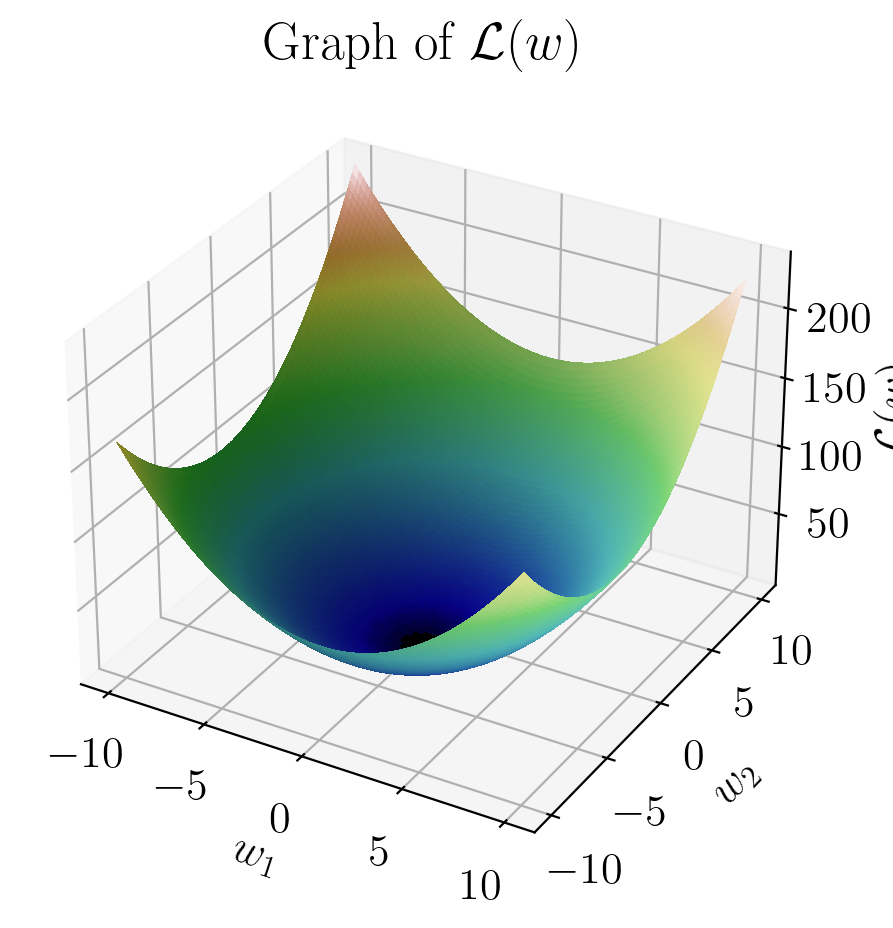

In [72]:
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(w1, w2, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('$\mathcal{L}(w)$')
ax.set_title(r'Graph of $\mathcal{L}(w)$')

plt.tight_layout()
plt.show()